In [57]:
!pip install ydata-profiling
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/390.0 kB ? eta -:--:--
   --- ------------------------------------ 30.7/390.0 kB 1.4 MB/s eta 0:00:01
   --- ------------------------------------ 30.7/390.0 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 81.9/390.0 kB 770.8 kB/s eta 0:00:01
   --------- ----------------------------- 92.2/390.0 kB 751.6 kB/s eta 0:00:01
   ----------- -------------------------- 122.9/390.0 kB 658.7 kB/s eta 0:00:01
   -------------- ----------------------- 153.6/390.0 kB 766.6 kB/s eta 0:00:01
   -------------- ----------------------- 153.6/390.0 kB 766.6 kB/s eta 0:00:01
   --------------------- ---------------- 225.3/390.0 kB 811.5 kB/s eta 0:00:01
   --------------------------- ---------- 286.7/390.0 kB 934.1 kB/s eta 0:00:01
   --------------------------- ---------- 286.7/390.0 kB 934.1 kB/s eta 0:00:01
   --------------------------

In [5]:
data_path = 'StudentPerformanceFactors.csv'
df = pd.read_csv(data_path)

headers = ["Hours_Studied","Attendance","Parental_Involvement","Access_to_Resources","Extracurricular_Activities",
           "Sleep_Hours","Previous_Scores","Motivation_Level","Internet_Access","Tutoring_Sessions","Family_Income",
           "Teacher_Quality","School_Type","Peer_Influence","Physical_Activity","Learning_Disabilities","Parental_Education_Level",
           "Distance_from_Home","Gender","Exam_Score"]

df.columns = headers
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [7]:
df.tail(8)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6599             30          94               Medium                 Low   
6600             12          98               Medium                 Low   
6601             20          83               Medium                 Low   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6599                         No            5               52   
6600                        Yes            4               54   
6601                         No            6               51   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6599              Low              No                  3          High   
6600           Medium             Yes                  2        Medium   
6601              Low             Yes                  2        Medium   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
6599          Medium     Private        Neutral                  2   
6600            High     Private        Neutral                  3   
6601          Medium      Public        Neutral                  4   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
6599                    No             Postgraduate           Moderate   
6600                    No              High School               Near   
6601                    No              High School           Moderate   
6602                    No              High School               Near   
6603                    No              High School               Near   
6604                    No             Postgraduate               Near   
6605                    No              High School                Far   
6606                    No             Postgraduate               Near   

      Gender  Exam_Score  
6599  Female          70  
6600  Female          67  
6601  Female          65  
6602  Female          68  
6603  Female          69  
6604  Female          68  
6605  Female          68  
6606    Male          64

In [13]:
df['Attendance'].dtype

dtype('int64')

In [15]:
df['Internet_Access'].dtype

dtype('O')

In [19]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [21]:
df_rank = df.groupby(['Exam_Score'])

In [23]:
df.replace("?", np.nan, inplace = True)
df['Previous_Scores'] = df['Previous_Scores'].astype('float')
df_sub = df[df['Previous_Scores'] > 50]
df_sub

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7             73.0   
1                            No            8             59.0   
2                           Yes            7             91.0   
3                           Yes            8             98.0   
4                           Yes            6             65.0   
...                         ...          ...              ...   
6602                         No            7             76.0   
6603                         No            8             81.0   
6604                        Yes            6             65.0   
6605                        Yes            6             91.0   
6606                        Yes            9             94.0   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [29]:
df_f = df[ df['Family_Income'] == 'Low']
df_f

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
6                29          84               Medium                 Low   
11               17          97               Medium                High   
14               10          78               Medium                High   
17               22          70                  Low              Medium   
...             ...         ...                  ...                 ...   
6593             16          75                 High                 Low   
6596             17          92               Medium              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7             73.0   
6                           Yes            7             68.0   
11                          Yes            6             87.0   
14                          Yes            8             74.0   
17                          Yes            6             82.0   
...                         ...          ...              ...   
6593                        Yes           10             53.0   
6596                         No            7             66.0   
6603                         No            8             81.0   
6604                        Yes            6             65.0   
6605                        Yes            6             91.0   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
6                 Low             Yes                  1           Low   
11                Low             Yes                  2           Low   
14             Medium             Yes                  1           Low   
17             Medium             Yes                  1           Low   
...               ...             ...                ...           ...   
6593             High             Yes                  0           Low   
6596              Low             Yes                  2           Low   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
6             Medium     Private        Neutral                  2   
11              High     Private        Neutral                  2   
14            Medium     Private        Neutral                  4   
17              High      Public        Neutral                  3   
...              ...         ...            ...                ...   
6593             Low      Public       Positive                  4   
6596             NaN      Public       Negative                  3   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
6                       No              High School           Moderate   
11                      No              High School               Near   
14                      No             Postgraduate               Near   
17                      No              High School               Near   
...                    ...                      ...                ...   
6593                    No                  College             

In [31]:
df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [33]:
df['Learning_Disabilities'].value_counts()

Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64

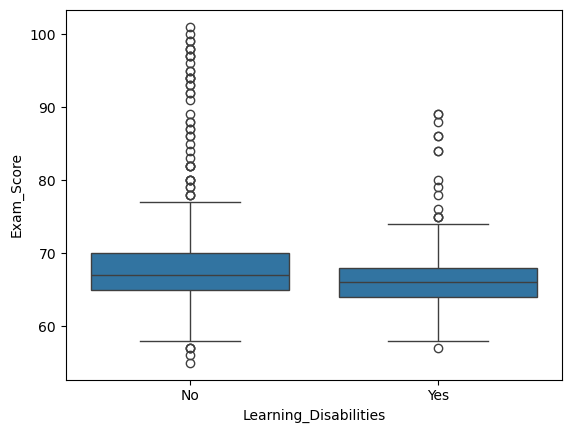

In [35]:
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df)
plt.show()

In [45]:
df_gptest = df.dropna(subset=['Motivation_Level', 'Teacher_Quality', 'Exam_Score'])
df_gptest = df[['Motivation_Level', 'Teacher_Quality', 'Exam_Score']]
grouped_test1 = df_gptest.groupby(['Teacher_Quality', 'Motivation_Level'], as_index=False).mean()
grouped_test1

Teacher_Quality Motivation_Level  Exam_Score
0            High             High   68.283951
1            High              Low   67.335052
2            High           Medium   67.628125
3             Low             High   67.029851
4             Low              Low   65.948718
5             Low           Medium   66.994550
6          Medium             High   67.552803
7          Medium              Low   66.572890
8          Medium           Medium   67.254912

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

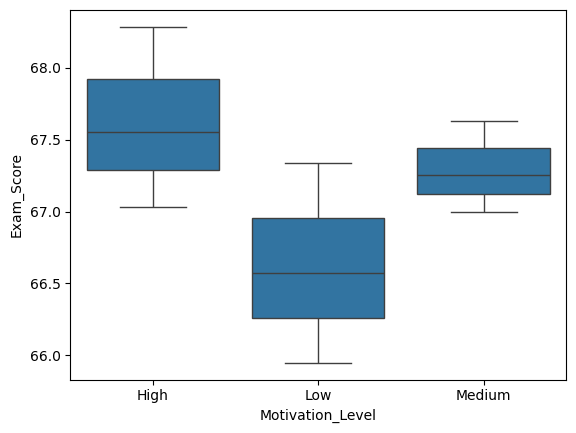

In [47]:
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=grouped_test1)

In [49]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions           1.000000           0.017733    0.156525  
Physical_Activity           0.017733           1.000000    0.027824  
Exam_Score                  0.156525           0.027824    1.000000

In [15]:
import pandas as pd
from ydata_profiling import ProfileReport
data_path = 'StudentPerformanceFactors.csv'
df = pd.read_csv(data_path)
profile = ProfileReport(
    df,title="Student Performance", 
    html={"style": {"full_width": True}}, 
    sort=None
)

In [17]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]